# Load and Save a model

This notebook loads a pretrained model and saves it.
The goal is to upload the model later to huggingface and test the model online.



## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from pathlib import Path
import imghdr

In [2]:
preprocess_input = tf.keras.applications.resnet_v2.preprocess_input

# example
preprocess_input(np.asarray([0, 255]))

array([-1.,  1.], dtype=float32)

Note: Alternatively, you could rescale pixel values from `[0, 255]` to `[-1, 1]` using `tf.keras.layers.Rescaling`. <br>
It is recommended to use preprocess_input, because when you change an other base application, you don't have to change the scaling ratio.

In [3]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

# example
rescale(np.asarray([0, 255]))

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.,  1.], dtype=float32)>

Note: If using other `tf.keras.applications`, be sure to check the API doc to determine if they expect pixels in `[-1, 1]` or `[0, 1]`, or use the included `preprocess_input` function.

## Download the model from the pre-trained EfficientNet
You will create the base model from the **EfficientNetB4** model. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like `jackfruit` and `syringe`. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, instantiate a EfficientNetB4 model pre-loaded with weights trained on ImageNet. By specifying the **include_top=True** argument, you load a network that does include the classification layers at the top, which is ideal for feature extraction.

In [4]:
IMG_SHAPE = (224, 224, 3)

In [15]:
# Create the base model from the pre-trained model EfficientNetB4
model = tf.keras.applications.MobileNetV3Large(input_shape=IMG_SHAPE,
                                               
                                               # include_top=True :Includes the fully connected layers for predictions 
                                               include_top=True,

                                               # weights from the imagenet challenge.
                                               weights='imagenet')

In [16]:
model.build(input_shape=IMG_SHAPE)

In [17]:
model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_1[0][0]']            
                                )                                                                 
                                                                                   

## Test the Model with a single image

1/1 [==============================] - 2s 2s/step
289
[[('n02128757', 'snow_leopard', 0.84875476), ('n02128385', 'leopard', 0.0349158), ('n02130308', 'cheetah', 0.021457493), ('n02124075', 'Egyptian_cat', 0.006221723), ('n02127052', 'lynx', 0.0051457486)]]


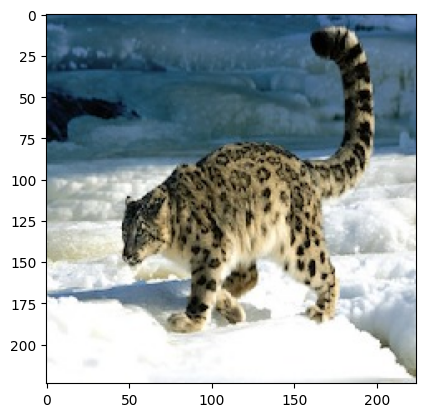

In [18]:
singel_tmp_image = tf.keras.utils.load_img('leopard.jpg',
                                            target_size=IMG_SHAPE,
                                            interpolation="nearest")


input_image = np.reshape(np.asarray(singel_tmp_image), ((1,) + IMG_SHAPE))
predictions = model.predict(input_image)
print(np.argmax(predictions))
print(tf.keras.applications.mobilenet_v3.decode_predictions(predictions))

plt.imshow(singel_tmp_image)


## Save Model

In [9]:
#Saving a Keras model:
model.save('models/mobilenetv3-imagenet')

INFO:tensorflow:Assets written to: models/mobilenetv3-imagenet/assets


INFO:tensorflow:Assets written to: models/mobilenetv3-imagenet/assets
